# Assignment 6

## Steven H. Yang, Minerva University

## Assignment Instructions:

### Speech recognition
This week’s assignment is a simplified form of speech recognition. The languages are artificial and have been generated using a combination of Markov models and hidden Markov models (HMMs). In real life things are much more messy! This artificial data makes for a better tutorial with cleaner results.
There are two forms of the datasets available. In the first form, there are several audio files, which can be parsed into discrete phonemes. In the second form, the parsing has already been done for you, and you are presented with long sequences of symbols. It is worth listening to the audio yourself, and seeing if you can determine any differences between the “languages” or “speakers” by ear!
If you want to process the audio dataset, then it is advised to use: scipy.io.wavfile to read an audio file. All audio will be single channel (mono) and noiselessly generated from a small set of component sounds.

### 1 - Language detection
There are three languages: A, B, and C. Each language uses the same set of symbols: “A, o, e, t, p, g, and k. However, each language uses the symbols differently. In each of these languages we can model everything as P(next symbol | current symbol).

1. There is training data available for each language. This consists of several files each generated by sampling from a Markov model. Using python, build a Markov model for each of the languages.
2. Now use the Markov model and Bayes’ rule to classify the test cases. Write down how you used Bayes’ rule to get your classifier. Give the full posterior distribution for each test case.

Audio dataset: https://course-resources.minerva.kgi.edu/uploaded_files/mke/nglEdY/audio.zip

Symbol dataset: https://course-resources.minerva.kgi.edu/uploaded_files/mke/ryDvKV/symbol.zip


In [52]:
import numpy as np
lang_A = []
lang_B = []
lang_C = []

for idx in range(30):
    with open(f'symbol/language-training-langA-{idx}', 'r') as file:
        lang_A.append(file.read().rstrip())
    with open(f'symbol/language-training-langB-{idx}', 'r') as file:
        lang_B.append(file.read().rstrip())
    with open(f'symbol/language-training-langC-{idx}', 'r') as file:
        lang_C.append(file.read().rstrip())

In [53]:
# The function below creates the Transition matrix.
def TransitionTable(lang):
    # The matrix would be the markov matrix
    markov_matrix = np.zeros((7,7))
    pos = {"A" : 0, "o" : 1, "e" : 2, "t" : 3, "p" : 4, "g" : 5, "k" : 6}
    for data in lang:
        for x in range(len(data)-1):
            # Make Dictionary for each iteration
            markov_matrix[pos[data[x]]][pos[data[x + 1]]] += 1

    markov_matrix = markov_matrix/markov_matrix.sum(axis=1)[:,None]
    return markov_matrix

In [54]:
markov_models = np.array([TransitionTable(lang_A), TransitionTable(lang_B), TransitionTable(lang_C)])

The assumption of this approach is that the starting symbols are uniformly distributed, so they are equally likely for the all the letters. Starting characters will not impact in any form in joint distribution. Markov chain here is the first order because it will define the next character based on the previous one.

Join distribution that I use:
$$P(x_1 = i_1, x_2 = i_2, ...x_{100} = i_{100} | lang_{p}) = P(x_1 = i_1 | lang_{p})\times P(x_2 = i_2|x_1 = i_1, lang_{p})...\times P(x_{100} = i_{100}|x_{99} = i_{99}, lang_{p})$$
where $i_{n}$ stands for the characters in the string and $lang_{p}$ stands for the present language.

Therefore, 
$$P(lang_{p} | x_1 = i_1, x_2 = i_2, ...x_{100} = i_{100}) = \frac{P(x_1 = i_1, x_2 = i_2, ...x_{100} = i_{100} | lang_{p})\times P(lang_{p})}{\sum_{p=a}^{c}{P(x_1 = i_1, x_2 = i_2, ...x_{100} = i_{100} | lang_{p})\times P(lang_{p})}}$$
$$P(x_1 = i_1, x_2 = i_2, ...x_{100} = i_{100} | lang_{p}) = P(x_1 = i_1 | lang_{p})\times P(x_2 = i_2|x_1 = i_1, lang_{p})...\times P(x_{100} = i_{100}|x_{99} = i_{99}, lang_{p})$$

As I have the training data based on the uniform distribution, I can assume that $P(lang_{p})$ is also uniformly distributed:

$$P(lang_{p} | x_1 = i_1, x_2 = i_2, ...x_{100} = i_{100}) = \frac{P(x_1 = i_1, x_2 = i_2, ...x_{100} = i_{100} | lang_{p})}{\sum_{p=a}^{c}{P(x_1 = i_1, x_2 = i_2, ...x_{100} = i_{100} | lang_{p})}}$$

In [55]:
test = []
for pos in range(10):
    with open(f'symbol/language-test-{pos}', 'r') as file:
        test.append(file.read().rstrip())

In [56]:
def classifier(test, markov_models):
    lang_classfied = []
    for data in test:
        lang_probabilities = []
        char_to_pos = {"A" : 0, "o" : 1, "e" : 2, "t" : 3, "p" : 4, "g" : 5, "k" : 6}
        classified = {0: "Lang A", 1: "Lang B", 2: "Lang C"}
        for model in markov_models:
            observed_probability = 1
            for pos in range(len(data)-1):
                observed_probability = observed_probability * model[char_to_pos[data[pos]]][char_to_pos[data[pos+1]]]
            lang_probabilities.append(observed_probability)
        lang_probabilities = np.array(lang_probabilities)
        lang_probabilities = lang_probabilities/np.sum(lang_probabilities)
        print(lang_probabilities)
        print("///////////////////////")
        expected_language = classified[lang_probabilities.argmax()] + " with probability " + str(max(lang_probabilities))
        lang_classfied.append(expected_language)
    return lang_classfied

In [57]:
classifier(test, markov_models)

[5.25656317e-61 0.00000000e+00 1.00000000e+00]
///////////////////////
[4.62774258e-68 0.00000000e+00 1.00000000e+00]
///////////////////////
[1.00000000e+00 0.00000000e+00 1.01255115e-34]
///////////////////////
[3.36109446e-46 1.00000000e+00 6.17618821e-59]
///////////////////////
[1.00000000e+00 0.00000000e+00 1.32153626e-46]
///////////////////////
[1.0000000e+00 0.0000000e+00 1.1527412e-39]
///////////////////////
[2.64631588e-63 1.00000000e+00 4.04976308e-62]
///////////////////////
[1.00000000e+00 0.00000000e+00 7.48011492e-42]
///////////////////////
[2.21983772e-81 0.00000000e+00 1.00000000e+00]
///////////////////////
[1.00000000e+00 0.00000000e+00 1.02438228e-46]
///////////////////////


['Lang C with probability 1.0',
 'Lang C with probability 1.0',
 'Lang A with probability 1.0',
 'Lang B with probability 1.0',
 'Lang A with probability 1.0',
 'Lang A with probability 1.0',
 'Lang B with probability 1.0',
 'Lang A with probability 1.0',
 'Lang C with probability 1.0',
 'Lang A with probability 1.0']

In [58]:
print(markov_models[2])

[[0.62117647 0.06823529 0.05411765 0.04705882 0.08470588 0.07058824
  0.05411765]
 [0.06712963 0.61574074 0.05324074 0.06944444 0.08333333 0.05092593
  0.06018519]
 [0.05841121 0.05607477 0.60747664 0.07242991 0.07476636 0.05841121
  0.07242991]
 [0.06849315 0.05936073 0.07077626 0.59817352 0.06392694 0.07990868
  0.05936073]
 [0.04241071 0.07142857 0.08928571 0.07142857 0.59821429 0.08705357
  0.04017857]
 [0.0812065  0.05800464 0.06960557 0.07424594 0.05104408 0.60092807
  0.0649652 ]
 [0.05163043 0.07880435 0.05706522 0.08423913 0.07608696 0.0625
  0.58967391]]


In [59]:
print(markov_models[1])

[[0.02406015 0.2887218  0.0406015  0.30075188 0.02857143 0.28270677
  0.03458647]
 [0.41634981 0.05703422 0.43346008 0.0513308  0.         0.0418251
  0.        ]
 [0.01977401 0.31355932 0.02966102 0.32485876 0.03672316 0.25282486
  0.02259887]
 [0.40152964 0.05736138 0.47227533 0.03632887 0.         0.03250478
  0.        ]
 [0.03846154 0.30769231 0.05769231 0.25       0.01923077 0.30769231
  0.01923077]
 [0.45253863 0.05077263 0.40838852 0.05077263 0.         0.03752759
  0.        ]
 [0.02325581 0.25581395 0.02325581 0.30232558 0.09302326 0.27906977
  0.02325581]]


### 2 - Speaker identification
There are three people in a room. Each says about 10 phonemes, before being randomly interrupted by someone else. When they speak they all sound the same, however each person tends to use different phonemes in their speech. Specifically we can model the following transition probabilities that someone will interrupt the current speaker: P(speaker i at time t+1 | speaker j at time t). We can also model the probability over phonemes given a particular speaker: P(phoneme | speaker i). The phonemes are identical to the ones introduced in problem 1 (but the transition matrices are obviously different, since they take a different form altogether).

1. Write down the update equations that you will need to train a hidden Markov model. Using the information given above, write down a sensible initialization for the transition matrix.
2. Write your own python code to train a hidden Markov model on the data. You may look at code online, but will need to reference any code that helps you with your implementation.
3. From matplotlb use a stackplot (https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.stackplot.html) to show the probability of a particular person speaking.

Audio dataset: https://course-resources.minerva.kgi.edu/uploaded_files/mke/VW8Rjr/speaker.wav.zip
Symbol dataset: https://course-resources.minerva.kgi.edu/uploaded_files/mke/n705lY/speaker


In [60]:
data = str(np.loadtxt('https://course-resources.minerva.kgi.edu/uploaded_files/mke/n705lY/speaker', dtype=str))

# To see if the data is correctly loaded
data

'eoggeggAeggepgpppoppogopppgoppoopegAAoAAAtAtttooepooppteeeeotpopppeeoepooopopgoooepoepotpoegogggggkeggpogopopeAtAttAoApAtttAggeAgegettttAAAAtoeeggeteoAopopotoktttpoepegpgtgAgAeeppeoooopgeggpAAAAgAtgegogoeepAtAtAAotAAAtttAtkAAAtAAktAAAtttAtAAoAtteeoopoAoAtoAAtAAApgeoeeeeoeeegteoAopeAkopgpeAgetAeeotAttAAeAAktttkAptAetAttAkAAAttAAkAAAttAAAAgAgkgogppgooApkpoAopopptotegoAppppAgettgtteAtttAAttAtpoooopopkeogeeettgtAAttAtAtttpopptoAokpopooooAooeoopopptoopgpAAootAtgtpgeeeeegegeAkeAgtoAoAooepgeegegeegekeegtoAAttttttggeegkeegggetgggggeggegeAgpoooktoppoopApoooAtAeAgegegoegeAgpeotppogpoppppoppoppoootAtAAAtApopoopooooopopppopoppoottoopopookAtAAAtettApAtttooAAtteeoAttppeAgtpeegoeeAtoAteeAeeppopekotktetppgpkgktopAAtkkgegttAAtoopopkeAApgoAotteegegeogkoggpAggpkAgAttttAAtAttAteeeopoetAttAtkeoAopgtAtktgtgttopooppgopppppppopeooAptoopopAookApoggtpttttoAoppoopAppoAoppooppptpAooppppppoooAAAtttttttAtteegggeeoeegeoeggkettkAAoAkAAteeggggkAgAtpAAAttAtAAAptAeppAAAopppAApkeeokpeegpppekpegeeeteoopoApoookoogggegekop

In [61]:
from hmmlearn import hmm
arr = [c for c in data]
print(arr)
chars_set = ["A", "o", "e", "t", "p", "g", "k"]

def idx_identifier(key, all_chars = chars_set):
    return all_chars.index(key)

idx = [[idx_identifier(val)] for val in arr]
print(idx)

['e', 'o', 'g', 'g', 'e', 'g', 'g', 'A', 'e', 'g', 'g', 'e', 'p', 'g', 'p', 'p', 'p', 'o', 'p', 'p', 'o', 'g', 'o', 'p', 'p', 'p', 'g', 'o', 'p', 'p', 'o', 'o', 'p', 'e', 'g', 'A', 'A', 'o', 'A', 'A', 'A', 't', 'A', 't', 't', 't', 'o', 'o', 'e', 'p', 'o', 'o', 'p', 'p', 't', 'e', 'e', 'e', 'e', 'o', 't', 'p', 'o', 'p', 'p', 'p', 'e', 'e', 'o', 'e', 'p', 'o', 'o', 'o', 'p', 'o', 'p', 'g', 'o', 'o', 'o', 'e', 'p', 'o', 'e', 'p', 'o', 't', 'p', 'o', 'e', 'g', 'o', 'g', 'g', 'g', 'g', 'g', 'k', 'e', 'g', 'g', 'p', 'o', 'g', 'o', 'p', 'o', 'p', 'e', 'A', 't', 'A', 't', 't', 'A', 'o', 'A', 'p', 'A', 't', 't', 't', 'A', 'g', 'g', 'e', 'A', 'g', 'e', 'g', 'e', 't', 't', 't', 't', 'A', 'A', 'A', 'A', 't', 'o', 'e', 'e', 'g', 'g', 'e', 't', 'e', 'o', 'A', 'o', 'p', 'o', 'p', 'o', 't', 'o', 'k', 't', 't', 't', 'p', 'o', 'e', 'p', 'e', 'g', 'p', 'g', 't', 'g', 'A', 'g', 'A', 'e', 'e', 'p', 'p', 'e', 'o', 'o', 'o', 'o', 'p', 'g', 'e', 'g', 'g', 'p', 'A', 'A', 'A', 'A', 'g', 'A', 't', 'g', 'e', 'g',

In [62]:
# Three speakers, iteration for 10,000 times
model = hmm.MultinomialHMM(n_components=3, n_iter=10000, init_params="e")

# Trasition Matrix
'''
probability of switching words : 0.9
probability of switching speakers: 0.05
'''
matrix = np.array([[0.90, 0.05, 0.05],
                        [0.05, 0.90, 0.05],
                        [0.05, 0.05, 0.90]])

model.transmat_ = matrix
model.fit(idx)
x_val = model.score(idx)

print(x_val)
X = model.predict_proba(idx)
print(X)


-1647.370214980968
[[5.53990277e-21 1.00000000e+00 2.67998882e-29]
 [3.23007803e-02 9.62904490e-01 4.79472982e-03]
 [3.97968719e-03 9.94939454e-01 1.08085887e-03]
 ...
 [8.63864459e-01 1.28838642e-01 7.29689840e-03]
 [9.55342441e-01 4.18920481e-02 2.76551125e-03]
 [9.54392109e-01 3.70590486e-02 8.54884246e-03]]


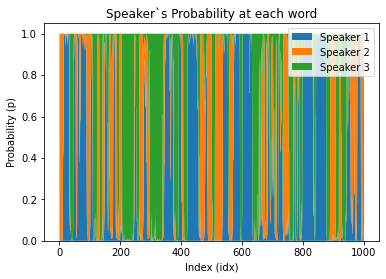

In [64]:
import matplotlib.pyplot as plt


word_idx = [x for x in range(len(data))]
result = {f"Speaker {i+1}": list(X.T[i]) for i in range(3)}

plt.stackplot(word_idx, result.values(),
             labels=result.keys())

plt.title('Stack plot for speaker probability at each word')
plt.title('Speaker`s Probability at each word')
plt.ylabel('Probability (p)')
plt.xlabel('Index (idx)')
plt.legend()
plt.show()